In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math 

# Read hmeq.csv file
hmeq = pd.read_csv("hmeq.csv")

# Removing any unnecessary column, because the data were just 13 column, 
# so i assume that column more than 13 were unnecessary
hmeq_prepared = hmeq.drop(columns=['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'])

# Drop Row that has NaN value
hmeq_prepared = hmeq_prepared.dropna()

# Seeing the first 5 row of data
hmeq_prepared.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,HomeImp,Other,9,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,HomeImp,Other,11,0.0,0.0,88.766030,0.0,8.0,36.884894
18,1,2300,28192.0,40150.0,HomeImp,Mgr,Other,4.5,0.0,0.000000,54.6,1.0,16.000000
19,0,2300,102370.0,120953.0,HomeImp,Office,2,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1,2400,34863.0,47471.0,HomeImp,Mgr,12,0.0,0.0,70.491080,1.0,21.0,38.263601


In [2]:
# Check Unique Value for some catagorical column
for column in ["BAD", "REASON", "JOB"]:
    print (hmeq_prepared[column].unique())

[1 0 3]
['HomeImp' 'DebtCon' 'DebtCons']
['Other' 'Mgr' 'Office' 'ProfExe' 'Sales' 'Self' 'Othe']


In [3]:
# Preparing data, changing catagorycal data into numeric data

# Mapping catagorical into numeric
hmeq_prepared['JOB'] = hmeq_prepared['JOB'].map({'Other': 0, 'Office':1, 'Sales':2, 'Mgr':3, 'ProfExe':4, 'Self':5}) 
# Filling any missing data in "JOB" variable using 0 ("i assume it will be other")
hmeq_prepared['JOB'] = hmeq_prepared['JOB'].fillna(0) 

# Mapping catagorical into numeric
hmeq_prepared['REASON'] = hmeq_prepared['REASON'].map({'HomeImp': 0, 'DebtCon': 1}) 
# Filling any missing data in "REASON" variable using 0 ("i assume it will be HomeImp")
hmeq_prepared['REASON'] = hmeq_prepared['REASON'].fillna(1) 

# Clean typo in "BAD" variable (there is data that typed 10 instead of 1)
hmeq_prepared['BAD'] = hmeq_prepared['BAD'].replace(10, 1)
# Clean typo in "BAD" variable (there is data that typed 3 instead of 1,
# i assume they type 3 because the loan were bad)
hmeq_prepared['BAD'] = hmeq_prepared['BAD'].replace(3, 1) 

# Seeing first 5 data
hmeq_prepared.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,0.0,0.0,9,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,0.0,0.0,11,0.0,0.0,88.766030,0.0,8.0,36.884894
18,1,2300,28192.0,40150.0,0.0,3.0,Other,4.5,0.0,0.000000,54.6,1.0,16.000000
19,0,2300,102370.0,120953.0,0.0,1.0,2,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1,2400,34863.0,47471.0,0.0,3.0,12,0.0,0.0,70.491080,1.0,21.0,38.263601


In [4]:
# Fuction for cleaning outlier from data, it will fill the outlier using median of data
def cleanOutlier(dataSet, listColumn):
    for column in listColumn:
        Q1 = dataSet[column].quantile(0.25)
        Q3 = dataSet[column].quantile(0.75)
        IQR = Q3-Q1
        outlier = ((dataSet[column] < (Q1 - 1.5 * IQR)) | (dataSet[column] > (Q3 + 1.5 * IQR)))
        dataSet[outlier] = np.nan
        dataSet[column] = dataSet[column].fillna(dataSet.mean())

# Normalize the data using MinMaxScaler, so the value of data will around 0-1
def normalizeDataset(dataset, listColumn=[]):
    if (len(listColumn) > 0):
        for column in listColumn:
            max_value = dataset[column].max()
            min_value = dataset[column].min()
            dataset[column] = (dataset[column] - min_value) / (max_value - min_value)
    else:
        dataset = (dataset - dataset.mean())/dataset.std()
        dataset = dataset.round(4) 

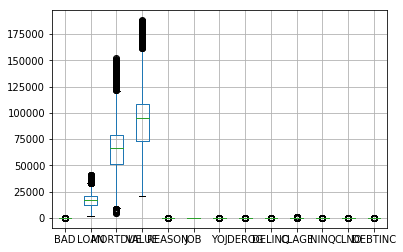

In [5]:
# Panda read the YOJ variable as "object" instead of number, so i changing it into number type
hmeq_prepared['YOJ'] = pd.to_numeric(hmeq_prepared['YOJ'], errors='coerce')
# Fill NaN value of YOJ using mean of YOJ
hmeq_prepared['YOJ'] = hmeq_prepared['YOJ'].fillna(hmeq_prepared['YOJ'].mean())
# Try to clean the data from outlier in any variable
cleanOutlier(hmeq_prepared, ['LOAN','MORTDUE','VALUE','CLNO','DEBTINC'])

# Filling any missing data in dataset using their represntative column
hmeq_prepared = hmeq_prepared.fillna(hmeq_prepared.mean())

# Seeing the boxplot result, to check if the outlier still exist
hmeq_prepared.boxplot()

In [6]:
# Try to normazise some variable in the dataset
normalizeDataset(hmeq_prepared, ['LOAN', 'JOB', 'REASON', 'MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC'])

In [7]:
hmeq_prepared.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.0,-0.082,-0.043,-0.078,-0.0039,-0.055,-0.063,0.17,0.28,-0.13,0.044,-0.031,0.13
LOAN,-0.082,1.0,0.15,0.33,0.33,0.1,0.099,-0.0072,-0.091,0.073,0.0003,0.11,0.15
MORTDUE,-0.043,0.15,1.0,0.84,0.069,0.24,-0.12,-0.041,-0.058,0.044,-0.026,0.32,0.24
VALUE,-0.078,0.33,0.84,1.0,0.051,0.32,-0.02,-0.062,-0.066,0.17,-0.021,0.29,0.17
REASON,-0.0039,0.33,0.069,0.051,1.0,-0.036,-0.12,-0.0048,-0.057,-0.032,0.057,0.086,0.069
JOB,-0.055,0.1,0.24,0.32,-0.036,1.0,-0.022,-0.049,-0.022,0.15,-0.031,0.18,-0.11
YOJ,-0.063,0.099,-0.12,-0.02,-0.12,-0.022,1.0,-0.037,0.056,0.27,-0.012,0.034,-0.035
DEROG,0.17,-0.0072,-0.041,-0.062,-0.0048,-0.049,-0.037,1.0,0.11,-0.07,0.58,-0.011,0.0083
DELINQ,0.28,-0.091,-0.058,-0.066,-0.057,-0.022,0.056,0.11,1.0,0.019,-0.017,0.12,0.0026
CLAGE,-0.13,0.073,0.044,0.17,-0.032,0.15,0.27,-0.07,0.019,1.0,-0.085,0.18,-0.076


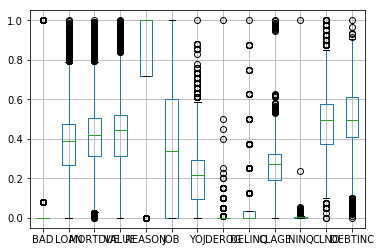

In [8]:
hmeq_prepared.boxplot()

In [9]:
# Saving the prepared hmeq to new csv file called hmeq_prepared.csv
hmeq_prepared.to_csv('hmeq_prepared.csv', sep=',', encoding='utf-8',index=False)

In [10]:
hmeq_prepared.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1.0,0.000000,0.173285,0.114819,0.0,0.0,0.219512,0.000,0.0,0.156162,0.004357,0.175,0.588928
7,1.0,0.002538,0.159366,0.131070,0.0,0.0,0.268293,0.000,0.0,0.136616,0.000000,0.175,0.582910
18,1.0,0.015228,0.157257,0.113802,0.0,0.6,0.222108,0.225,0.0,0.000000,0.237890,0.000,0.033325
19,0.0,0.015228,0.661886,0.597623,0.0,0.2,0.048780,0.000,0.0,0.140043,0.000000,0.300,0.443535
25,1.0,0.017766,0.202640,0.157637,0.0,0.6,0.292683,0.000,0.0,0.108490,0.004357,0.500,0.619190
